In [1436]:
# Jesse Doris
# Homework 2

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Part 1: Wrangling

In [1437]:
# Problem 1

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

# Problem 1

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID"

team_salaries = pd.read_sql(salary_query, conn)
team_salaries.index = team_salaries.index + 1

#team_salaries

wins_query = "SELECT yearID, teamID, W, G FROM Teams GROUP BY yearID, teamID"

team_wins = pd.read_sql(wins_query, conn)
team_wins = team_wins.ix[1917:]
team_wins.index = team_wins.index - 1916

#Salary data starts at 1985, win data starts at 1871, so the win data from 1871-1984 was dropped, data starts from 1985
#The join I used (left join) will fill in NULL for total_payroll for those years of missing data

team_wins['winning %'] = (team_wins['W'] / team_wins['G']) * 100

team_wins['total_payroll'] = team_salaries['total_payroll']

team_wins


,yearID,teamID,W,G,winning %,total_payroll
1,1985,ATL,66,162,40.740741,14807000.0
2,1985,BAL,83,161,51.552795,11560712.0
3,1985,BOS,81,163,49.693252,10897560.0
4,1985,CAL,90,162,55.555556,14427894.0
5,1985,CHA,85,163,52.147239,9846178.0
6,1985,CHN,77,162,47.530864,12702917.0
7,1985,CIN,89,162,54.938272,8359917.0
8,1985,CLE,60,162,37.037037,6551666.0
9,1985,DET,84,161,52.173913,10348143.0
10,1985,HOU,83,162,51.234568,9993051.0


# Part 2: Exploratory Data Analysis

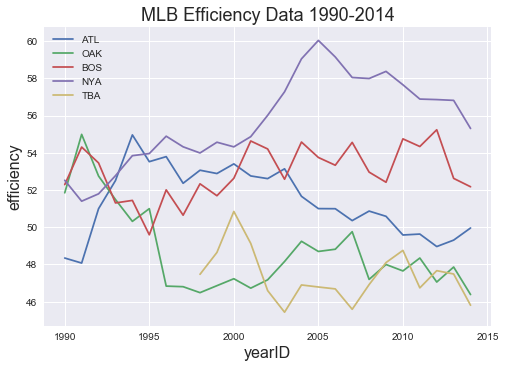

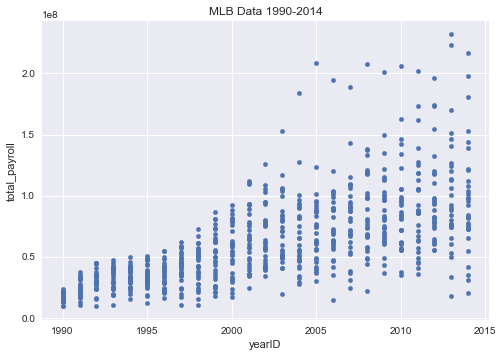

In [1438]:
# Problem 2

df = team_wins.ix[131:]
df.index = df.index - 130
#df

# Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014).
df.plot(kind='scatter', x='yearID', y='total_payroll' , title = 'MLB Data 1990-2014');

plt.show()
plt.gcf().clear()


# Question 1

# What statements can you make about the distribution of payrolls conditioned on time based on these plots?
# Remember you can make statements in terms of central tendency, spread, etc.

# Instead of making multiple plots, I plotted the total payroll data for each team together for each year
# on a single scatter plot. The distribution of payrolls are very close together in the 1990's, with every team 
# spending generally around the same quantity of money. There is also a general trend of the groupings of data points
# moving upward, meaning that teams on average are collectively are spending more money on players as time goes on. However, the 
# distribution and variance of the teams payrolls become farther and farther apart. This could represent some teams becomming richer 
# than others and being able to spend more money on players every year, while teams that have little money every year 
# can only spend the bare minimum.


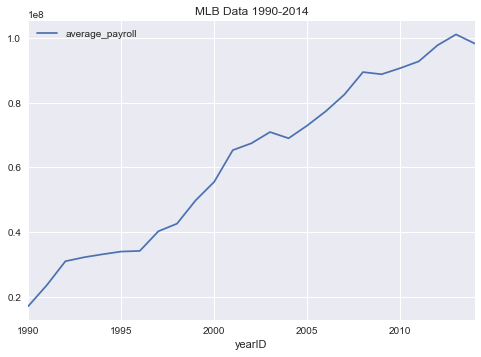

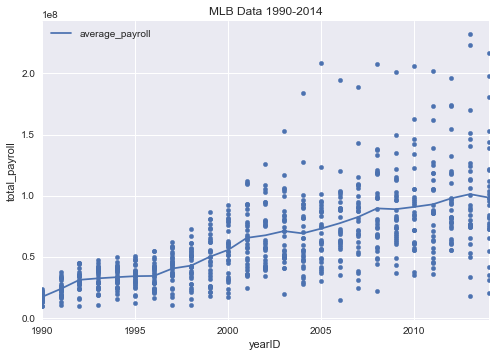

In [1439]:
# Problem 3

# Write code to produce plots that specifically show at least one of the statements you made in Question 1. 
# For example, if you make a statement that there is a trend for payrolls to decrease over time,
# make a plot of a statistic for central tendency (e.g., mean payroll) vs. time to show that specficially.

df2 = pd.DataFrame()
df2['yearID'] = df['yearID']
df2['average_payroll'] = df['total_payroll']
df2 = df2.groupby(['yearID'],as_index=False).mean()

df2.plot(x='yearID', y='average_payroll', title = 'MLB Data 1990-2014');

ax = df.plot(kind='scatter', x='yearID', y='total_payroll', title = 'MLB Data 1990-2014')

# I made the statement based on the previous graph that the average team_payroll per year was increasing as time went on.
# So, I decided to plot a continuous line graph of the average team_payroll in the league for each year.
# This graph confirmed the trend that I described earlier. To further demonstrate this, I overlayed the two graphs to use
# the line graph as a model for repesenting the data of the first graph.

df2.plot(x='yearID', y='average_payroll', title = 'MLB Data 1990-2014' ,ax=ax)

plt.show()
plt.gcf().clear()



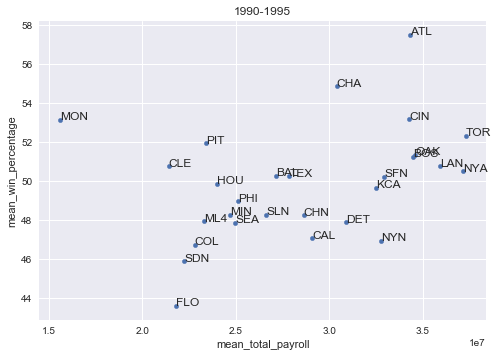

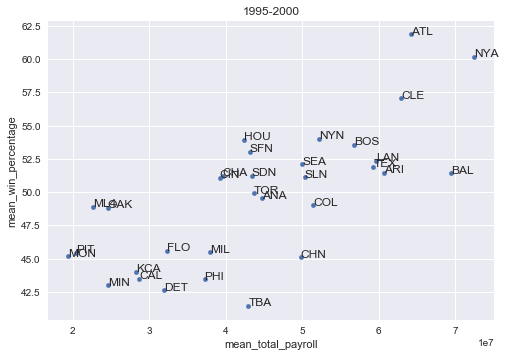

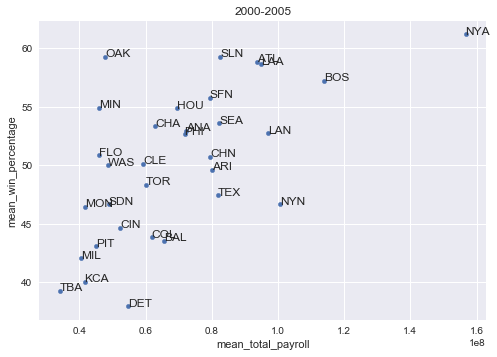

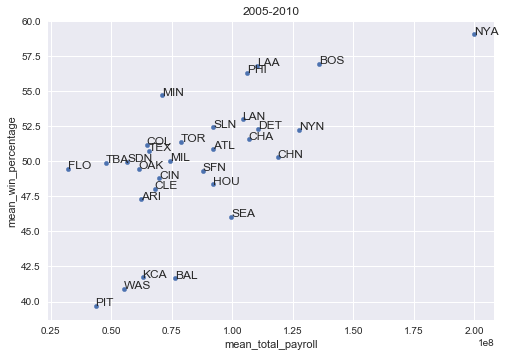

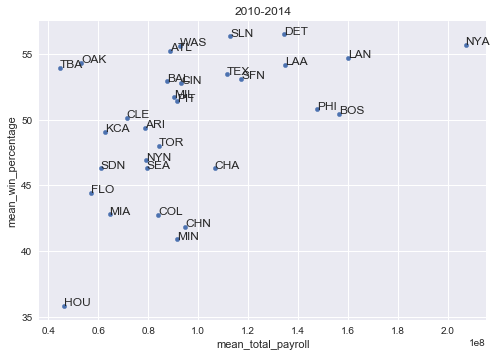

In [1440]:
# Problem 4

# Write code to discretize year into five time periods and then make a scatterplot showing mean 
# winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods. 
# You could add a regression line (using, e.g., NumPy's polyfit) in each scatter plot to ease interpretation.

df3 = pd.DataFrame()
df3['teamID'] = df['teamID']
df3['mean_win_percentage'] = df['winning %']
df3['mean_total_payroll'] = df['total_payroll']

df_new1 = df3[ : 162]
df_new2 = df3[162:308]
df_new3 = df3[308:458]
df_new4 = df3[458:608]
df_new5 = df3[608:758]

df_new1 = df_new1.groupby(['teamID'],as_index=False).mean()
df_new2 = df_new2.groupby(['teamID'],as_index=False).mean()
df_new3 = df_new3.groupby(['teamID'],as_index=False).mean()
df_new4 = df_new4.groupby(['teamID'],as_index=False).mean()
df_new5 = df_new5.groupby(['teamID'],as_index=False).mean()


ax1 = df_new1.plot(kind='scatter', x='mean_total_payroll', y='mean_win_percentage', title = '1990-1995')
ax2 = df_new2.plot(kind='scatter', x='mean_total_payroll', y='mean_win_percentage', title = '1995-2000')
ax3 = df_new3.plot(kind='scatter', x='mean_total_payroll', y='mean_win_percentage', title = '2000-2005')
ax4 = df_new4.plot(kind='scatter', x='mean_total_payroll', y='mean_win_percentage', title = '2005-2010')
ax5 = df_new5.plot(kind='scatter', x='mean_total_payroll', y='mean_win_percentage', title = '2010-2014')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
    
label_point(df_new1.mean_total_payroll, df_new1.mean_win_percentage, df_new1.teamID, ax1)
label_point(df_new2.mean_total_payroll, df_new2.mean_win_percentage, df_new2.teamID, ax2)
label_point(df_new3.mean_total_payroll, df_new3.mean_win_percentage, df_new3.teamID, ax3)
label_point(df_new4.mean_total_payroll, df_new4.mean_win_percentage, df_new4.teamID, ax4)
label_point(df_new5.mean_total_payroll, df_new5.mean_win_percentage, df_new5.teamID, ax5)
    
plt.show()


# Question 2
# What can you say about team payrolls across these periods? 
# Are there any teams that standout as being particularly good at paying for wins across these time periods?
# What can you say about the Oakland A’s spending efficiency across these time periods.

# The team payrolls saw a significant change after the 2000 year period, when the Moneyball strategy started to
# first be used. There then was a shift in many teams statistics, showing that other teams may have possibly adapted this 
# strategy. The New York Yankees always seem to spend the most money and have a high win percentage along with the Braves
# and the Redsox. Before the Moneyball strategy in 2003 as shown in the first graph, there was almost a linear relationship
# between money spent and winning percentage. However, this slowly began to change after Moneyball. The Oakland A's
# spending efficiency became significantly better in 2003 as seen in the third graph and onward, showing that this
# strategy definitely worked and allowed them to be competitive with teams that had more money to spend on star players.


# Part 3: Data transformations

In [1441]:
# Problem 5

df4 = df3.copy()
df4['yearID'] = df['yearID']
df3['yearID'] = df['yearID']
del df4['teamID']
del df4['mean_win_percentage']
df5 = df4.copy()
df4 = df4.groupby(['yearID'],as_index=False).mean()
df3.index = df3.index -1

#df4 is a dataframe used to store all the average data per every 
# unique year (one entry [average_payroll] for each year 1990-2014)

df3 = df3.merge(df4, left_on='yearID', right_on='yearID')

#assign each average payroll for each year to the table with entries for each team

df3 = df3.rename(columns={'mean_win_percentage': 'win_percent', 'mean_total_payroll_x': 'total_payroll'})
df3 = df3.rename(columns={'mean_total_payroll_y': 'mean_yearly_payroll'})

df3['var'] = (df3['total_payroll'] - df3['mean_yearly_payroll'])**2

df5['var'] = df3['var']
del df5['mean_total_payroll']

df5 = df5.groupby(['yearID'],as_index=False).mean()
df5['std_dev'] = df5['var']**(1/2)
del df5['var']

df3 = df3.merge(df5, left_on='yearID', right_on='yearID')
df3['standarized_payroll'] = (df3['total_payroll'] - df3['mean_yearly_payroll'])/(df3['std_dev'])
df3
                    




,teamID,win_percent,total_payroll,yearID,mean_yearly_payroll,var,std_dev,standarized_payroll
0,ATL,40.123457,14555501.0,1990,1.707235e+07,6.334547e+12,3.803426e+06,-0.661733
1,BAL,47.204969,9680084.0,1990,1.707235e+07,5.464565e+13,3.803426e+06,-1.943582
2,BOS,54.320988,20558333.0,1990,1.707235e+07,1.215205e+13,3.803426e+06,0.916537
3,CAL,49.382716,21720000.0,1990,1.707235e+07,2.160062e+13,3.803426e+06,1.221963
4,CHA,58.024691,9491500.0,1990,1.707235e+07,5.746934e+13,3.803426e+06,-1.993164
5,CHN,47.530864,13624000.0,1990,1.707235e+07,1.189114e+13,3.803426e+06,-0.906644
6,CIN,56.172840,14370000.0,1990,1.707235e+07,7.302715e+12,3.803426e+06,-0.710505
7,CLE,47.530864,14487000.0,1990,1.707235e+07,6.684053e+12,3.803426e+06,-0.679743
8,DET,48.765432,17593238.0,1990,1.707235e+07,2.713206e+11,3.803426e+06,0.136951
9,HOU,46.296296,18330000.0,1990,1.707235e+07,1.581675e+12,3.803426e+06,0.330661


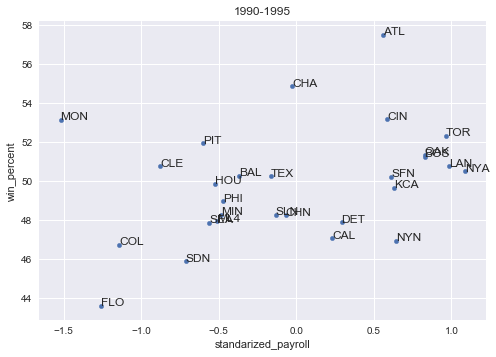

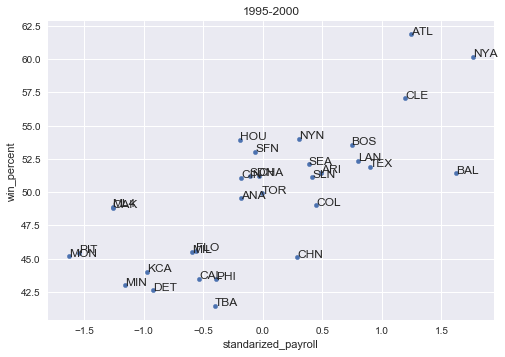

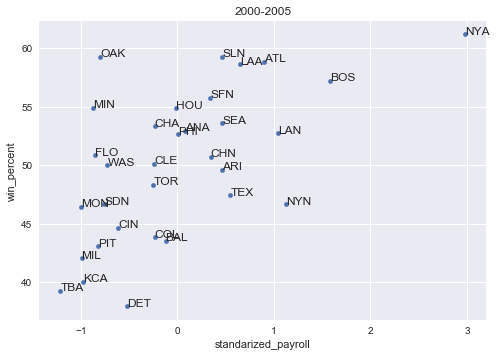

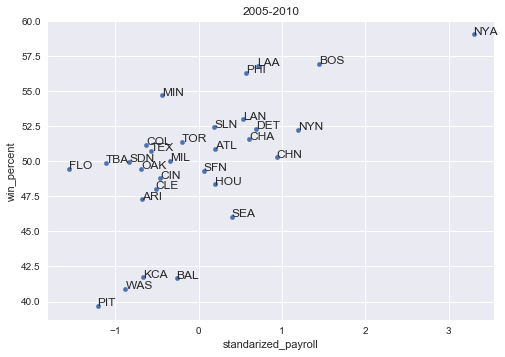

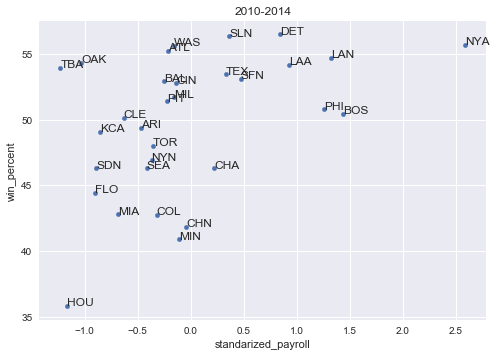

In [1442]:
# Problem 6

df6 = pd.DataFrame()
df6['teamID'] = df3['teamID']
df6['win_percent'] = df3['win_percent']
df6['standarized_payroll'] = df3['standarized_payroll']

df_new1 = df6[ : 162]
df_new2 = df6[162:308]
df_new3 = df6[308:458]
df_new4 = df6[458:608]
df_new5 = df6[608:758]

df_new1 = df_new1.groupby(['teamID'],as_index=False).mean()
df_new2 = df_new2.groupby(['teamID'],as_index=False).mean()
df_new3 = df_new3.groupby(['teamID'],as_index=False).mean()
df_new4 = df_new4.groupby(['teamID'],as_index=False).mean()
df_new5 = df_new5.groupby(['teamID'],as_index=False).mean()


ax1 = df_new1.plot(kind='scatter', x='standarized_payroll', y='win_percent', title = '1990-1995')
ax2 = df_new2.plot(kind='scatter', x='standarized_payroll', y='win_percent', title = '1995-2000')
ax3 = df_new3.plot(kind='scatter', x='standarized_payroll', y='win_percent', title = '2000-2005')
ax4 = df_new4.plot(kind='scatter', x='standarized_payroll', y='win_percent', title = '2005-2010')
ax5 = df_new5.plot(kind='scatter', x='standarized_payroll', y='win_percent', title = '2010-2014')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
    
label_point(df_new1.standarized_payroll, df_new1.win_percent, df_new1.teamID, ax1)
label_point(df_new2.standarized_payroll, df_new2.win_percent, df_new2.teamID, ax2)
label_point(df_new3.standarized_payroll, df_new3.win_percent, df_new3.teamID, ax3)
label_point(df_new4.standarized_payroll, df_new4.win_percent, df_new4.teamID, ax4)
label_point(df_new5.standarized_payroll, df_new5.win_percent, df_new5.teamID, ax5)
    
plt.show()

# Question 3
# Discuss how the plots from Problem 4 and Problem 6 reflect the transformation you did on the payroll variable.

# The payroll variable has now been standardized. This means the data has been transformed to have zero mean 
# and unit variance, and the data is no longer bounded. The data is now easier to use for multivariate analysis



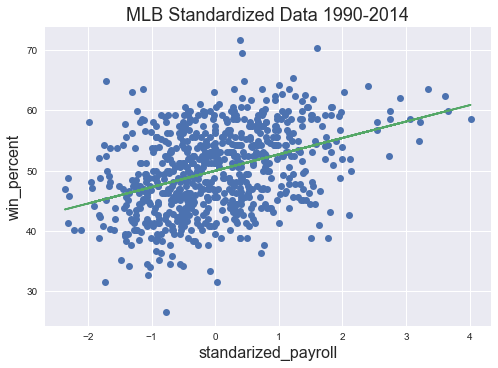

In [1443]:
# Problem 7

# Make a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis). 
# Add a regression line to highlight the relationship.

x = df6['standarized_payroll']
y = df6['win_percent']
slope, intercept, r_value, p_value, std_err = stats.linregress(df6['standarized_payroll'],df6['win_percent'])
line = slope*x+intercept
plt.plot(x,y,'o', x, line)
plt.xlabel('standarized_payroll', fontsize=16)
plt.ylabel('win_percent', fontsize=16)
plt.title('MLB Standardized Data 1990-2014' , fontsize = 18)

plt.show()







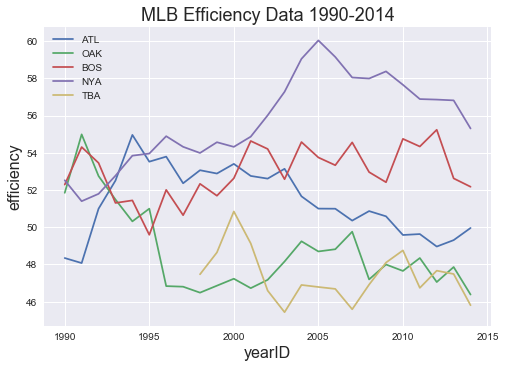

In [1444]:
# Problem 8

df6['efficiency'] = 50 + 2.5 * df6['standarized_payroll']
df6['yearID'] = df3['yearID']
del df6['standarized_payroll']

df_new1 = df6[df6.teamID == 'ATL']
df_new2 = df6[df6.teamID == 'OAK']
df_new3 = df6[df6.teamID == 'BOS']
df_new4 = df6[df6.teamID == 'NYA']
df_new5 = df6[df6.teamID == 'TBA']

x1,x2,x3,x4,x5 = df_new1 ['yearID'], df_new2 ['yearID'], df_new3 ['yearID'], df_new4 ['yearID'], df_new5 ['yearID']
y1,y2,y3,y4,y5 = df_new1 ['efficiency'], df_new2 ['efficiency'], df_new3 ['efficiency'], df_new4 ['efficiency'], df_new5 ['efficiency']

plt.plot(x1,y1, label= 'ATL')
plt.plot(x2,y2, label= 'OAK')
plt.plot(x3,y3, label= 'BOS')
plt.plot(x4,y4, label= 'NYA')
plt.plot(x5,y5, label= 'TBA')

plt.legend(loc='upper left')
plt.xlabel('yearID', fontsize=16)
plt.ylabel('efficiency', fontsize=16)
plt.title('MLB Efficiency Data 1990-2014' , fontsize = 18)

plt.show()



# Question 4
# What can you learn from this plot compared to the set of plots you looked at in Question 2 and 3?
# How good was Oakland’s efficiency during the Moneyball period?

# The data shows that the NY Yankees and the Boston Redsox despite normally spending the mst mney, have steadily 
# improved in efficiency over the past 25 years. This data plot is also much easier to view the efficiency progression
# for individual teams than the earlier plots. It is interesting to note that the efficiency of the Oakland As during the 
# Moneyball period is less than expected when compared to the other teams and plots. During that time period there was definitely
# an overall slight increase in the As efficiency compared to the previous few years, however, the overall trend shows their 
# efficiency to actually decrease. Overall, the data shows that the Moneyball strategy can only be slightly effective
# and that in the end, money is still power. Having a large of money to spend of players will in return increase
# your winning percentage. This shows that data can have different meanings depending on how it is analyzed.






